In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [4]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

In [9]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

In [10]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
X_test = X_test / 255.0

In [12]:
pixel_means = X_train.mean(axis=0, keepdims=True)

In [13]:
pixel_stds = X_train.std(axis=0, keepdims=True)

In [14]:
X_train_scaled = (X_train - pixel_means) / pixel_stds

In [15]:
X_valid_scaled = (X_valid - pixel_means) / pixel_stds

In [16]:
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [17]:
# 학습률 스케쥴링

In [18]:
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4) # 1e-4 = 0.0001

In [19]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])

In [20]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
             metrics=['accuracy'])

In [21]:
%%time
n_epochs = 25
hist = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                 validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 8s 146us/sample - loss: 0.4868 - accuracy: 0.8297 - val_loss: 0.4128 - val_accuracy: 0.8552
Epoch 2/25
55000/55000 [==============================] - 7s 125us/sample - loss: 0.3813 - accuracy: 0.8644 - val_loss: 0.3785 - val_accuracy: 0.8712
Epoch 3/25
55000/55000 [==============================] - 7s 126us/sample - loss: 0.3492 - accuracy: 0.8757 - val_loss: 0.3724 - val_accuracy: 0.8720
Epoch 4/25
55000/55000 [==============================] - 7s 125us/sample - loss: 0.3288 - accuracy: 0.8833 - val_loss: 0.3576 - val_accuracy: 0.8722
Epoch 5/25
55000/55000 [==============================] - 7s 125us/sample - loss: 0.3126 - accuracy: 0.8894 - val_loss: 0.3476 - val_accuracy: 0.8762
Epoch 6/25
55000/55000 [==============================] - 7s 126us/sample - loss: 0.3002 - accuracy: 0.8937 - val_loss: 0.3475 - val_accuracy: 0.8770
Epoch 7/25
55000/55000 [===========================

In [29]:
learning_rate = 0.01
decay = 1e-4  # 0.0001
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size  # 55000 // 32 ==> 1718
epochs = np.arange(n_epochs)  # n_epochs=25, np.arange ==> [0, ..., 24]
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)
print( lrs )

[0.01       0.00853388 0.00744269 0.00659892 0.00592698 0.00537924
 0.00492417 0.00454009 0.00421159 0.00392742 0.00367918 0.00346045
 0.00326627 0.00309272 0.00293669 0.00279564 0.00266752 0.00255063
 0.00244355 0.00234511 0.00225428 0.00217023 0.00209223 0.00201963
 0.00195191]


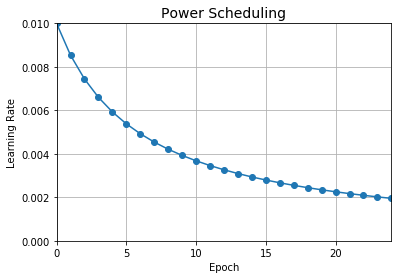

In [38]:
plt.plot(epochs, lrs, "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [39]:
# 지수 기반 스케줄링

In [40]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch/20)

In [ ]:
# lr = lr0 * 0.1**(epoch/s)

In [41]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.01**(epoch/s)
    return exponential_decay_fn

In [42]:
exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [43]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=['accuracy'])
n_epochs = 25

In [44]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [46]:
%%time
hist = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                 validation_data=(X_valid_scaled, y_valid),
                callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 13s 237us/sample - loss: 0.8518 - accuracy: 0.7528 - val_loss: 0.8953 - val_accuracy: 0.7790
Epoch 2/25
55000/55000 [==============================] - 11s 208us/sample - loss: 0.6061 - accuracy: 0.8084 - val_loss: 0.6069 - val_accuracy: 0.8206
Epoch 3/25
55000/55000 [==============================] - 12s 210us/sample - loss: 0.5080 - accuracy: 0.8349 - val_loss: 0.5936 - val_accuracy: 0.8246
Epoch 4/25
55000/55000 [==============================] - 11s 208us/sample - loss: 0.4358 - accuracy: 0.8559 - val_loss: 0.5082 - val_accuracy: 0.8370
Epoch 5/25
55000/55000 [==============================] - 11s 208us/sample - loss: 0.3830 - accuracy: 0.8694 - val_loss: 0.4851 - val_accuracy: 0.8662
Epoch 6/25
55000/55000 [==============================] - 11s 208us/sample - loss: 0.3416 - accuracy: 0.8825 - val_loss: 0.4137 - val_accuracy: 0.8684
Epoch 7/25
55000/55000 [=====================

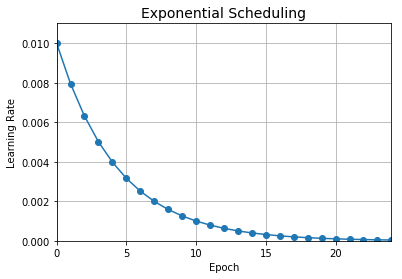

In [47]:
plt.plot(hist.epoch, hist.history["lr"], "o-")
plt.axis([0, n_epochs-1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()